### Handeling Simple Datasets and Transformations with Pytorch

In [72]:
import torch 
import numpy as np
import pandas as pd
import datetime

In [73]:
# epoch 
! ../../epochgen.py ef
datetime.datetime.now()

Epoch ~ (2020-11-26 17:07:17.498258)
Decomposed Date ~  November 26, 2020;


datetime.datetime(2020, 11, 26, 17, 7, 17, 604296)

### Numerical Data

The Following Describes the Class blueprints typically used to load the datasets

In [74]:
import torch
from torch.utils.data import Dataset
torch.manual_seed(101)

In [75]:
class simpleset:
    # constructor, an essestial function to construct the inital objects required
    # transform in here is defined later, which is another class blueprint which holds 
    # all the transformative operations to be done on the tensor, ex add, mul etc
    def __init__(self, length =100, transform=None):
        self.len = length
        self.x = 5 * torch.ones(length,3) + 1 
        self.y = torch.ones(length, 1)
        self.transform = transform 
        
    def __getitem__(self,index):
        sample = self.x[index], self.y[index]
        if self.transform != None:
            sample = self.transform(sample)
            return sample
        else:
            return sample
    def __len__(self):
        return self.len
        
# __ (double underscores) infront of the function definition will make the objects tensors
# directly accessible without explicitly defining the function name 
# ex def _getitem_ would require us to do obj._getitem_(index) to access a value 
# but with __getitem__ it would simple be obj[index]

In [76]:
dataset0 = simpleset()

In [77]:
dataset0[1]

(tensor([6., 6., 6.]), tensor([1.]))

In [78]:
our_dataset = simpleset()
print("Our toy_set object: ", our_dataset)
print("Value on index 0 of our toy_set object: ", our_dataset[0])
print("Our toy_set length: ", len(our_dataset))
print("also other way to get len: ",our_dataset.len)

Our toy_set object:  <__main__.simpleset object at 0x7ffa29359350>
Value on index 0 of our toy_set object:  (tensor([6., 6., 6.]), tensor([1.]))
Our toy_set length:  100
also other way to get len:  100


In [79]:
for x,y in our_dataset:
    print(x,y)

tensor([6., 6., 6.]) tensor([1.])
tensor([6., 6., 6.]) tensor([1.])
tensor([6., 6., 6.]) tensor([1.])
tensor([6., 6., 6.]) tensor([1.])
tensor([6., 6., 6.]) tensor([1.])
tensor([6., 6., 6.]) tensor([1.])
tensor([6., 6., 6.]) tensor([1.])
tensor([6., 6., 6.]) tensor([1.])
tensor([6., 6., 6.]) tensor([1.])
tensor([6., 6., 6.]) tensor([1.])
tensor([6., 6., 6.]) tensor([1.])
tensor([6., 6., 6.]) tensor([1.])
tensor([6., 6., 6.]) tensor([1.])
tensor([6., 6., 6.]) tensor([1.])
tensor([6., 6., 6.]) tensor([1.])
tensor([6., 6., 6.]) tensor([1.])
tensor([6., 6., 6.]) tensor([1.])
tensor([6., 6., 6.]) tensor([1.])
tensor([6., 6., 6.]) tensor([1.])
tensor([6., 6., 6.]) tensor([1.])
tensor([6., 6., 6.]) tensor([1.])
tensor([6., 6., 6.]) tensor([1.])
tensor([6., 6., 6.]) tensor([1.])
tensor([6., 6., 6.]) tensor([1.])
tensor([6., 6., 6.]) tensor([1.])
tensor([6., 6., 6.]) tensor([1.])
tensor([6., 6., 6.]) tensor([1.])
tensor([6., 6., 6.]) tensor([1.])
tensor([6., 6., 6.]) tensor([1.])
tensor([6., 6.

### Transform Class blueprint

In [80]:
class add_mult:
    def __init__(self, addx = 5, mult = 2):
        self.addx = addx
        self.mult = mult 
    
    # executor 
    def __call__(self,sample):
        x,y = sample
        x += self.addx
        y *= self.mult
        sample = x,y
        return sample
        

In [81]:
x,y = our_dataset[0]

In [82]:
x,y

(tensor([6., 6., 6.]), tensor([1.]))

In [83]:
transformobj = add_mult()

In [84]:
print('original data : ',x,y)

original data :  tensor([6., 6., 6.]) tensor([1.])


In [85]:
x_,y_ = transformobj(our_dataset[0])

In [86]:
print('transformed data:',x_,y_)

transformed data: tensor([11., 11., 11.]) tensor([2.])


Now, we can use this transform blueprint in the initial simpleset class blueprint

In [87]:
newset = simpleset(transform= transformobj)

In [88]:
newset

In [89]:
newset[1] # transformed 

(tensor([11., 11., 11.]), tensor([2.]))

### Torchvision's Compose

In [90]:
from torchvision import transforms

In [91]:
# consider a new transform mult, which multiplies 100 to x and y vectors ( tensors )
class mult:
    
    def __init__(self, mult=100):
        self.mult = mult
    
    # executor
    def __call__(self, sample):
        x,y = sample
        x *= self.mult
        y *= self.mult
        sample = x,y
        return sample 

Now what if we want the data to be transformed by the first transform first i.e ( add_mult ) and then pass through the second tranform, something like this 
<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%201/1.3.1_trasform.png" width="500" alt="Compose PyTorch">


In [92]:
compose_obj = transforms.Compose([add_mult(),mult()])
print("The combination of transforms (Compose): ", compose_obj)

The combination of transforms (Compose):  Compose(
)


In [93]:
newsample = simpleset()

In [94]:
newsample[0]

(tensor([6., 6., 6.]), tensor([1.]))

In [95]:
# transforming through the compose object 
compose_trans_sample = compose_obj(newsample[0])

In [96]:
compose_trans_sample

(tensor([1100., 1100., 1100.]), tensor([200.]))

### Image Data

In [97]:
'''
! wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/datasets/img.tar.gz 
!tar -xf ./img.tar.gz 
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/datasets/index.csv 
'''

'\n! wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/datasets/img.tar.gz \n!tar -xf ./img.tar.gz \n!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/datasets/index.csv \n'

In [100]:
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt 
from PIL import Image
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [103]:
def plotimg(datasample, shape =(26,26)):
    plt.imshow(datasample[0].numpy().reshape(shape),cmap='gray')
    plt.title('y = ' + data_sample[1])
    plt.show()

In [113]:
directory="./IBMpynbs/"
csv_file ='index.csv'
csv_path=os.path.join(directory,csv_file)

In [114]:
csv_path

'./IBMpynbs/index.csv'

In [115]:
data_name = pd.read_csv(csv_path)
data_name.head()

,category,image
0,Ankle boot,img/fashion0.png
1,T-shirt,img/fashion1.png
2,T-shirt,img/fashion2.png
3,Dress,img/fashion3.png
4,T-shirt,img/fashion4.png


The first column of the dataframe corresponds to the type of clothing. The second column is the name of the image file corresponding to the clothing. You can obtain the path of the first file by using the method  <code> <i>DATAFRAME</i>.iloc[0, 1]</code>. The first argument corresponds to the sample number, and the second input corresponds to the column index. 


In [116]:
print('File name:', data_name.iloc[0, 1])

File name: img/fashion0.png


In [117]:
print('File name:', data_name.iloc[1, 1])
print('class or y:', data_name.iloc[1, 0])

File name: img/fashion1.png
class or y: T-shirt


In [118]:
print('The number of rows: ', data_name.shape[0])

The number of rows:  60000


In [120]:
data_name.shape

(60000, 2)

In [121]:
# opening an Image

In [130]:
directory # where the images exist

'./IBMpynbs/'

In [131]:
imgpath = data_name.iloc[5,1]
imgpath = os.path.join(directory, imgpath)

In [132]:
imgpath

'./IBMpynbs/img/fashion5.png'

Text(0.5, 1.0, 'y = Pullover')

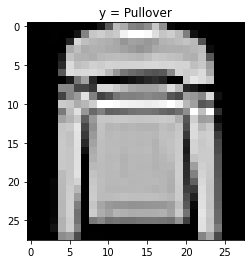

In [142]:
img = Image.open(imgpath)
plt.imshow(img,cmap='gray', vmin=0, vmax=255)
plt.title('y = '+data_name.iloc[5,0])

In [148]:
# we can do the same with a makeshift function for this to grab any index
def show_img(index,data,directory='./'):
    imgpath = data.iloc[index,1]
    imgpath = os.path.join(directory,imgpath)
    
    img = Image.open(imgpath)
    plt.imshow(img,vmin=0,vmax=255,cmap='gray')
    plt.title('y = '+data.iloc[index,0])
    plt.show()
    
    

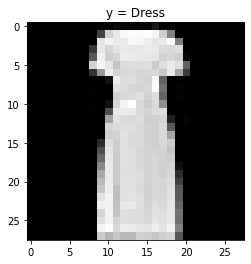

In [150]:
show_img(50,data_name,directory)

### Class blueprint to handle Image Data

In [175]:
class imagedataset:
    def __init__(self,csv_file,data_dir,transform=None):
        self.csv_file = csv_file
        self.data_dir = data_dir
        self.transform = transform
        
        datapath = os.path.join(self.data_dir,self.csv_file)
        self.dataset = pd.read_csv(datapath)
        
        self.len = self.dataset.shape[0]
        
    def __len__(self):
        return self.len
        
    def __getitem__(self,index):
        
        imgpath = os.path.join(self.data_dir,self.dataset.iloc[index,1])
        image = Image.open(imgpath)
        
        y = self.dataset.iloc[index,0]
        
        if self.transform != None:
            image = self.transform(image)
            return image, y
        else:
            return image, y

In [176]:
dataset = imagedataset(csv_file=csv_file, data_dir=directory)

In [177]:
dataset

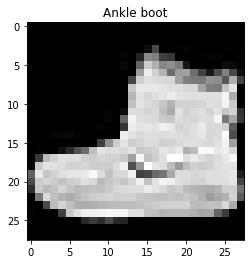

In [185]:
image=dataset[0][0]
y=dataset[0][1]

plt.imshow(image,cmap='gray', vmin=0, vmax=255)
plt.title(y)
plt.show()

### TorchVision Transforms

In [186]:
# transformations in the Images are ususally done to create data augmentation

In [194]:
from torchvision import transforms

In [195]:
centercropobj = transforms.Compose([transforms.CenterCrop(20),transforms.ToTensor()])
newtransforms = imagedataset(csv_file,directory,transform=centercropobj)

In [196]:
newtransforms[0][0] # since we passed transform, now the returned output in a tensor

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0118, 0.0000, 0.1412, 0.5333, 0.4980, 0.2431, 0.2118, 0.0000,
          0.0000, 0.0000, 0.0039, 0.0118],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0235, 0.0000, 0.4000, 0.8000, 0.6902, 0.5255, 0.5647, 0.4824,
          0.0902, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.6078, 0.9255, 0.8118, 0.6980, 0.4196, 0.6118,
          0.6314, 0.4275, 0.2510, 0.0902],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039,
          0.0000, 0.2706, 0.8118, 0.8745, 0.8549, 0.8471, 0.8471, 0.6392,
          0.4980, 0.4745, 0.4784, 0.5725],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0039,
          0.0000, 0.7843, 0.9098, 0.9098, 0.9137, 0.8980, 0.8745, 0.8745,
          0.8431, 0.8353, 0.6431, 0.4980],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0

In [197]:
image = newtransforms[0][0]
label = newtransforms[0][1]

In [198]:
image.shape

torch.Size([1, 20, 20])

In [199]:
label

'Ankle boot'

In [208]:
newtransforms[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0118, 0.0000, 0.1412, 0.5333, 0.4980, 0.2431, 0.2118, 0.0000,
           0.0000, 0.0000, 0.0039, 0.0118],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0235, 0.0000, 0.4000, 0.8000, 0.6902, 0.5255, 0.5647, 0.4824,
           0.0902, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.6078, 0.9255, 0.8118, 0.6980, 0.4196, 0.6118,
           0.6314, 0.4275, 0.2510, 0.0902],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039,
           0.0000, 0.2706, 0.8118, 0.8745, 0.8549, 0.8471, 0.8471, 0.6392,
           0.4980, 0.4745, 0.4784, 0.5725],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0039,
           0.0000, 0.7843, 0.9098, 0.9098, 0.9137, 0.8980, 0.8745, 0.8745,
           0.8431, 0.8353, 0.6431, 0.4980],
          [0.0000, 0.0000, 0.0

Text(0.5, 1.0, 'Ankle boot')

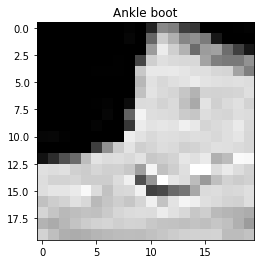

In [213]:
plt.imshow(image.numpy().reshape(20,20),cmap='gray')
plt.title(label) # center cropped image

In [215]:
# another example

In [218]:
image = newtransforms[10][0]
label = newtransforms[10][1]

Text(0.5, 1.0, 'T-shirt')

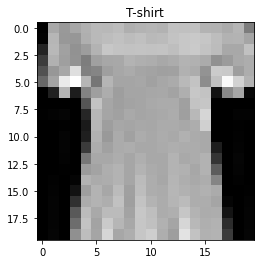

In [219]:
plt.imshow(image.numpy().reshape(20,20),cmap='gray')
plt.title(label) # center cropped image

Let's try another Transform, transform.RandomVerticalFlip

In [235]:
verticalflipobj = transforms.Compose([transforms.RandomVerticalFlip(p=1),transforms.ToTensor()])
fliptransforms = imagedataset(csv_file,directory,transform=verticalflipobj)

In [238]:
flipimage = fliptransforms[0][0]
fliplabel = fliptransforms[0][1]

In [239]:
flipimage.shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Ankle boot')

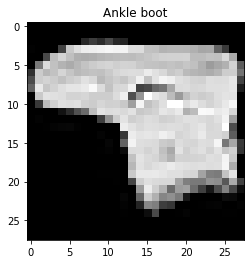

In [245]:
plt.imshow(flipimage.numpy().reshape(28,28),cmap='gray')
plt.title(fliplabel) # vertical flipped 